# Group Assigment 2 - Transformer Models



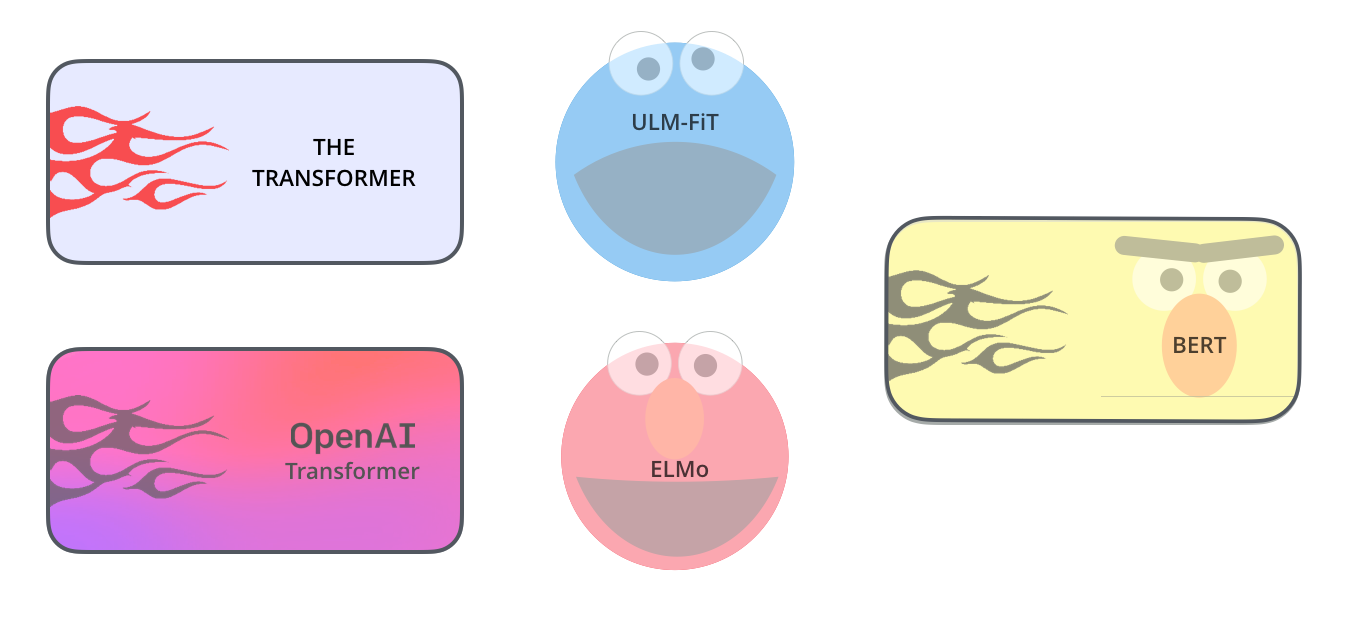

**Group Members**

*   Benjamin Ly - 20205432
*   Camilla Dyg Hannesbo - 20202923
*   Tobias Moesgård Jensen - 20231658

**Delivery**

*   Create a dedicated GitHub repository for this assignment.
*   Store all relevant materials, including the Colab notebook, in the repository.
*   Provide a README.md file with a concise description of the assignment and its components.
*   You may work individually or in groups of up to three members.
*   Submit your work by emailing a link to the repository to Hamid (hamidb@business.aau.dk).

## Part 1: SBERT and Semantic Search

**Task Description**

Create something innovative using SBERT and semantic search, or even more! The guidelines are intentionally broad to encourage creativity. Here are some ideas to get you started:



*   Implement a GIF search engine or YouTube search function using images and CLIP.
*   (Optional) Use SetFit for supervised tasks with SBERT models.
*   Consider building a search engine using a Gradio or Streamlit app.


In [1]:
pip install -U -q pandas sentence-transformers tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 21.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.20.1 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.0 which is incompatible.


In [2]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 9.6 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

In [3]:
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Use wget to download the master.zip file which contains the dataset
!wget https://github.com/raingo/TGIF-Release/archive/master.zip -q

In [5]:
!unzip master.zip

Archive:  master.zip
3e54d2f71418d8a2e9f5f61aa5be0edb9c0ac2b8
   creating: TGIF-Release-master/
  inflating: TGIF-Release-master/.gitignore  
  inflating: TGIF-Release-master/.gitmodules  
  inflating: TGIF-Release-master/LICENSE  
  inflating: TGIF-Release-master/README.md  
   creating: TGIF-Release-master/code/
  inflating: TGIF-Release-master/code/README.md  
   creating: TGIF-Release-master/code/crowdflower/
 extracting: TGIF-Release-master/code/crowdflower/.gitignore  
  inflating: TGIF-Release-master/code/crowdflower/.gitmodules  
  inflating: TGIF-Release-master/code/crowdflower/README.md  
   creating: TGIF-Release-master/code/crowdflower/back-end/
  inflating: TGIF-Release-master/code/crowdflower/back-end/.gitignore  
  inflating: TGIF-Release-master/code/crowdflower/back-end/deploy.sh  
  inflating: TGIF-Release-master/code/crowdflower/back-end/entity_extract.py  
  inflating: TGIF-Release-master/code/crowdflower/back-end/eval.py  
   creating: TGIF-Release-master/code/crowd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import gradio as gr

In [8]:
# Load dataset to a pandas dataframe
df = pd.read_csv(
    "./TGIF-Release-master/data/tgif-v1.0.tsv",
    delimiter="\t",
    names=['url', 'description']
)
df.head()

,url,description
0,https://38.media.tumblr.com/9f6c25cc350f12aa74...,"a man is glaring, and someone with sunglasses ..."
1,https://38.media.tumblr.com/9ead028ef62004ef6a...,a cat tries to catch a mouse on a tablet
2,https://38.media.tumblr.com/9f43dc410be85b1159...,a man dressed in red is dancing.
3,https://38.media.tumblr.com/9f659499c8754e40cf...,an animal comes close to another in the jungle
4,https://38.media.tumblr.com/9ed1c99afa7d714118...,a man in a hat adjusts his tie and makes a wei...


In [9]:
len(df)


125782

In [10]:
# Number of *unique* GIFs in the dataset
len(df["url"].unique())

102068

In [11]:
# we will only use 20k datarows
df = df.iloc[:20000]

In [12]:
dupes = df['url'].value_counts().sort_values(ascending=False)
dupes.head()

url
https://38.media.tumblr.com/469019d29c0b142ba4ebd62a87b9bcd9/tumblr_no9h931IyN1se2m5wo1_250.gif    3
https://38.media.tumblr.com/4777f41709f6e48c55199612da8d31ae/tumblr_no7shthCvP1smaq3so1_250.gif    3
https://31.media.tumblr.com/9f5add17e162f05ee828b90c58a8a316/tumblr_nnohewxZAc1s9i6j1o1_400.gif    3
https://38.media.tumblr.com/d5163408cc6b787661a0eb3fa439b9e5/tumblr_ni4qhxft1T1tnkki4o1_400.gif    3
https://38.media.tumblr.com/fadd4086e6b45f2d09b67d9ad9ae025e/tumblr_nov7syZ0sP1uwxmtlo1_400.gif    3
Name: count, dtype: int64

In [13]:
dupe_url = "https://33.media.tumblr.com/88235b43b48e9823eeb3e7890f3d46ef/tumblr_nkg5leY4e21sof15vo1_500.gif"
dupe_df = df[df['url'] == dupe_url]

# let's take a look at this GIF and it's duplicated descriptions
for _, gif in dupe_df.iterrows():
    HTML(f"<img src={gif['url']} style='width:120px; height:90px'>")
    print(gif["description"])

In [14]:
for _, gif in df[5:10].iterrows():
  HTML(f"<img src={gif['url']} style='width:120px; height:90px'>")
  print(gif["description"])

someone puts a cat on wrapping paper then wraps it up and puts on a bow


a brunette woman is looking at the man


a man on a bicycle is jumping over a fence.


a group of men are standing and staring in the same direction.


a man with black clothes is dancing sexy


In [15]:
# Creating 5 search examples to examine performance of the model
search_examples = ["someone puts a cat on wrapping paper then wraps it up and puts on a bow",
                    "a brunette woman is looking at the man",
                    "a man on a bicycle is jumping over a fence",
                    "a group of men are standing and staring in the same direction",
                    "a man with black clothes is dancing sexy"]

In [16]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm
torch.set_num_threads(4)

In [17]:
#First, we load the respective CLIP model
model = SentenceTransformer('clip-ViT-B-32')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [18]:
gif_description = df['description'].values.tolist()

In [19]:
corpus_embeddings = model.encode(gif_description, convert_to_tensor=True)

In [20]:
# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(gif_description))
for query in search_examples:
    query_embedding = model.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(gif_description[idx], "(Score: {:.4f})".format(score))





Query: someone puts a cat on wrapping paper then wraps it up and puts on a bow

Top 5 most similar sentences in corpus:
someone puts a cat on wrapping paper then wraps it up and puts on a bow (Score: 1.0000)
a cat is toying with a torn paper off a package. (Score: 0.7702)
a cat is batting at a wrapping paper tube. (Score: 0.7511)
a cat are ripping up and unrolling a roll of toilet paper. (Score: 0.7262)
a cat is biting and pulling at paper then it lies back (Score: 0.7262)




Query: a brunette woman is looking at the man

Top 5 most similar sentences in corpus:
a brunette woman is looking at the man (Score: 1.0000)
a woman is looking at a man. (Score: 0.9504)
it is a woman looking at a man really dramatically (Score: 0.9373)
a young woman is looking at a young man. (Score: 0.9327)
the man is looking up at the woman worried (Score: 0.9299)




Query: a man on a bicycle is jumping over a fence

Top 5 most similar sentences in corpus:
a man on a bicycle is jumping over a fence. (Scor

In [21]:
# Converting columns from the dataset to lists to be used as output in the semantic search function
url = df['url'].values.tolist()
description = df['description'].values.tolist()

In [22]:
# Defining the semantic search function to return gif url, description and cosinus score
def query_corpus(query):
  results = []
  query_embedding = model.encode(query, convert_to_tensor=True)
  cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
  top_results = torch.topk(cos_scores, k=top_k)

  for score, idx in zip(top_results[0], top_results[1]):
    results.append(
        (url[idx],
         description[idx],
         score))
    Url = results[0][0]
    gif = f'<img src="{Url}" alt="gif" style="max-width: 200%;"/>'
    desc = "Description: " + results[0][1]
    score = "Cosinus Score: " + str(results[0][2].numpy())
  return gif, desc, score

In [23]:
query_corpus('Man snowboarding')

('<img src="https://33.media.tumblr.com/46cdfaf7f736e4e084ca4868aa125079/tumblr_no90qlFKNA1uufz07o1_400.gif" alt="gif" style="max-width: 200%;"/>',
 'Description: someone jumps off a bump while snowboarding.',
 'Cosinus Score: 0.89771414')

In [24]:
# Create the interface
iface = gr.Interface(
    fn=query_corpus,
    inputs="text",
    outputs=["html", "text", "text"],
    title="Semantic Search",
    description="Enter your query to search for relevant content.",
    examples=[["Bunny eating fruits"]]
)

# Launch the interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6dfc4a400a4e616c4a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Part 2: Gradient Descent and Attention Mechanism Exercises

**Task Description**

*   **Gradient Descent Exercise:** Execute the process of updating weights for two examples using Stochastic Gradient Descent (SGD). Document each step, including input calculation, prediction, loss assessment, weight adjustments, and updates.

*   **Attention Mechanism Exercise:** Implement the attention mechanism on two distinct sentences. Choose sentences with polysmous words to demonstrate its functionality effectively.





### Gradient Descent Exercise

In [25]:
# Define the Examples and Initial Weights:

import numpy as np

# Examples (features and target)
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# Initial weights
weights = np.random.randn(1)
bias = np.random.randn(1)


In [26]:
# Define the Prediction Function:

def predict(X, weights, bias):
    return np.dot(X, weights) + bias


In [27]:
# Define the Loss Function (Mean Squared Error):

def calculate_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [28]:
# Define the Gradient Calculation Function:

def calculate_gradients(X, y_true, y_pred):
    dw = np.mean(-2 * X * (y_true - y_pred))
    db = np.mean(-2 * (y_true - y_pred))
    return dw, db


In [29]:
# Define the SGD Update Step:

def update_weights(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

In [30]:
# Execute SGD for Each Example:

learning_rate = 0.01
num_epochs = 100

loss_set = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i in range(len(X)):
        # Step 1: Prediction
        y_pred = predict(X[i], weights, bias)

        # Step 2: Loss assessment
        loss = calculate_loss(y[i], y_pred)
        epoch_loss += loss

        # Step 3: Gradient calculation
        dw, db = calculate_gradients(X[i], y[i], y_pred)

        # Step 4: Weight adjustments
        weights, bias = update_weights(weights, bias, dw, db, learning_rate)

    # Store average loss for this epoch
    epoch_loss /= len(X)
    loss_set.append(epoch_loss)

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}')


Epoch 10/100, Loss: 0.05027078184664709
Epoch 20/100, Loss: 0.03504035488080329
Epoch 30/100, Loss: 0.024423978764217025
Epoch 40/100, Loss: 0.01702410665364761
Epoch 50/100, Loss: 0.011866215990139112
Epoch 60/100, Loss: 0.008271040871002862
Epoch 70/100, Loss: 0.005765116457230357
Epoch 80/100, Loss: 0.004018426251761248
Epoch 90/100, Loss: 0.002800940737388232
Epoch 100/100, Loss: 0.0019523237513497892


Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training Loss over Epochs')

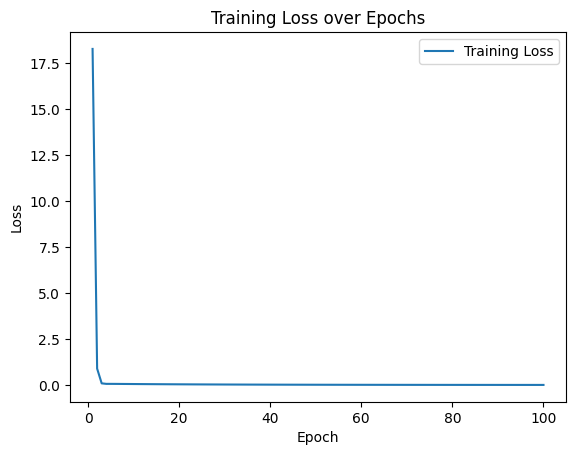

In [31]:
import matplotlib.pyplot as plt

# Plot
plt.plot(range(1, num_epochs+1), loss_set, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


### Attention Mechanism Exercise

In [32]:
!pip install sentence_transformers --q

In [33]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load SBERT model
model_2 = SentenceTransformer('paraphrase-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [34]:
# Define the sentences
sentence1 = "She saw a bat flying in the night sky"
sentence2 = "He used a bat to hit the baseball during the game"

In [35]:
# Compute sentence embeddings
embeddings = model_2.encode([sentence1, sentence2])

In [36]:
# Encode the sentences to get embeddings
embedding1 = model_2.encode([sentence1])[0]
embedding2 = model_2.encode([sentence2])[0]

# Print the embeddings
print("Sentence 1:", sentence1)
print("Embedding shape:", embedding1.shape)
print("")

print("Sentence 2:", sentence2)
print("Embedding shape:", embedding2.shape)


Sentence 1: She saw a bat flying in the night sky
Embedding shape: (384,)

Sentence 2: He used a bat to hit the baseball during the game
Embedding shape: (384,)


In [37]:
# Function to compute attention scores and context vector
def compute_attention(target_word, sentence):
    attention_scores = {}
    tokens = sentence.split()
    for token in tokens:
        score = np.dot(model_2.encode([target_word, token])[0], model_2.encode([token, target_word])[0])  # Cosine similarity
        attention_scores[token] = score
    # Softmax
    exp_scores = {k: np.exp(v) for k, v in attention_scores.items()}
    total_exp_score = sum(exp_scores.values())
    softmax_scores = {k: v / total_exp_score for k, v in exp_scores.items()}
    # Compute context vector
    context_vector = np.zeros_like(embeddings[0])
    for token, score in softmax_scores.items():
        context_vector += model_2.encode([token])[0] * score
    return context_vector

In [38]:
# Extract words from both sentences
words = sentence1.split() + sentence2.split()

# Remove duplicate words
words = list(set(words))

# Extract word vectors
word_vectors = [model_2.encode([word])[0] for word in words]

# Extract the coordinates for 2D plotting (using the first two dimensions)
x_2d = [vector[0] for vector in word_vectors]
y_2d = [vector[1] for vector in word_vectors]

Text(0.18293245, 0.4996035, 'sky')

Text(0.20572944, 0.5492683, 'to')

Text(-0.5131655, 0.13823682, 'saw')

Text(0.28579637, 0.33935127, 'night')

Text(0.15111095, 0.65986514, 'game')

Text(-0.31575128, 0.7867629, 'a')

Text(-0.5495343, 0.4779966, 'used')

Text(0.06962752, 0.47804227, 'during')

Text(-0.025955789, -0.036314685, 'hit')

Text(-0.050079823, 0.8925123, 'the')

Text(0.47231904, 0.27436706, 'She')

Text(0.37731242, 0.6093887, 'bat')

Text(0.37012658, 0.98034525, 'baseball')

Text(0.17319012, 0.9741911, 'He')

Text(0.31473613, 0.55097604, 'in')

Text(0.41344106, 0.38177574, 'flying')

Text(0.5, 0, 'Dimension 1')

Text(0, 0.5, 'Dimension 2')

Text(0.5, 1.0, '2D plot of word embeddings')

(-0.6006269887089729,
 0.5234117045998573,
 -0.08714768160134553,
 1.0311782458797096)

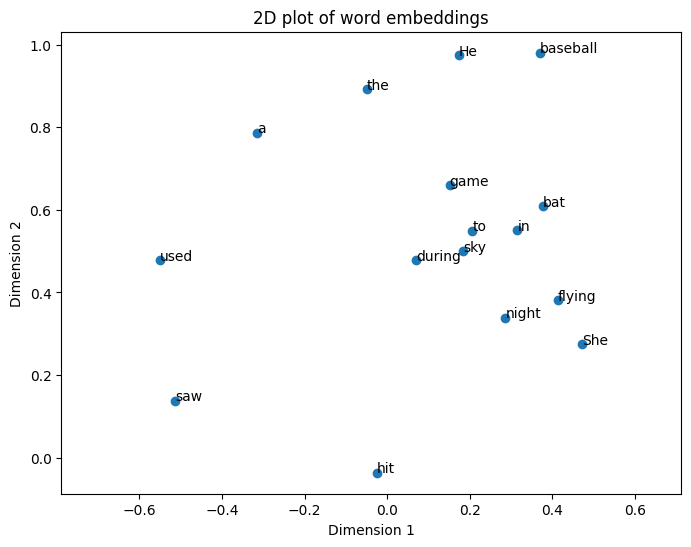

In [39]:
# Create a 2D plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter the points
ax.scatter(x_2d, y_2d)

# Annotate the points with words
for i, word in enumerate(words):
    ax.text(x_2d[i], y_2d[i], word)

# Set labels
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('2D plot of word embeddings')

# Set equal scaling
ax.axis('equal')

# Show the plot
plt.show()

In [40]:
# Tokenize the sentences
tokens1 = sentence1.split()
tokens2 = sentence2.split()

# Encode the tokens to get embeddings
embeddings1 = model_2.encode(tokens1)
embeddings2 = model_2.encode(tokens2)

In [41]:
# Assuming you already have the attention output for both sentences
# Let's create a dummy attention output for illustration
attention_output_1 = np.random.rand(len(tokens1), 2)
attention_output_2 = np.random.rand(len(tokens2), 2)

Text(0.5, 1.0, 'Original Word Embeddings for Sentence 2')

Text(0.5, 0, 'Dimension 1')

Text(0, 0.5, 'Dimension 2')

Text(0.5, 1.0, 'Self-Attention Output Vectors for Sentence 2')

Text(0.5, 0, 'Dimension 1')

Text(0, 0.5, 'Dimension 2')

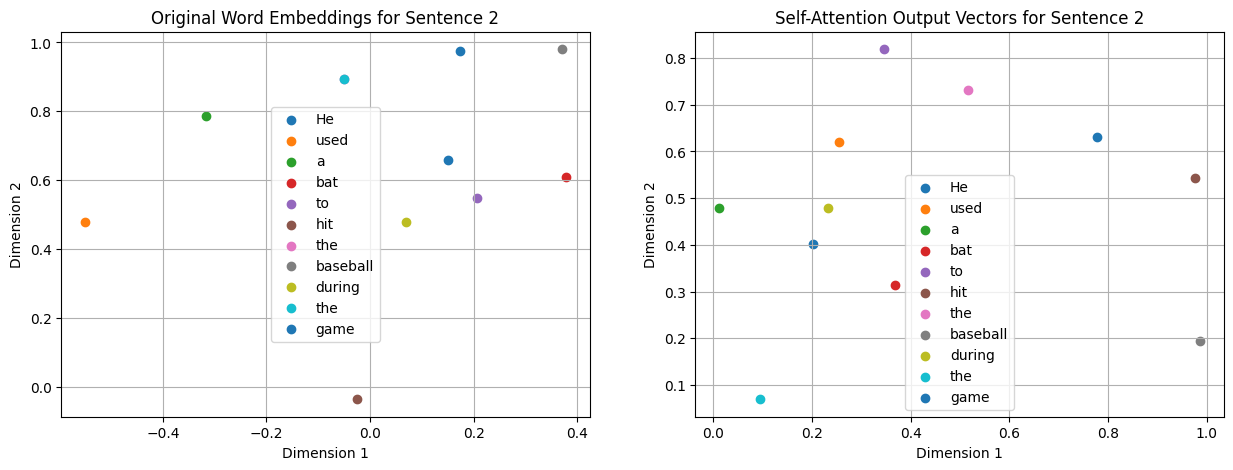

In [42]:
# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings for sentence 1
for i, word in enumerate(tokens2):
    axes[0].scatter(embeddings2[i, 0], embeddings2[i, 1], label=f"{word}")

axes[0].set_title('Original Word Embeddings for Sentence 2')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot output vectors for sentence 1
for i, word in enumerate(tokens2):
    axes[1].scatter(attention_output_2[i, 0], attention_output_2[i, 1], label=f"{word}")

axes[1].set_title('Self-Attention Output Vectors for Sentence 2')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()

plt.show()

In [43]:
!pip install transformers matplotlib --q

In [44]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import numpy as np

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_3 = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Encode text
text1 = "She saw a bat flying in the night sky"
text2 = "He used a bat to hit the baseball during the game"
inputs1 = tokenizer(text1, return_tensors="pt")
inputs2 = tokenizer(text2, return_tensors="pt")

# Get model output
with torch.no_grad():
    outputs1 = model_3(**inputs1)

# Get model output
with torch.no_grad():
    outputs2 = model_3(**inputs2)

# Extract attentions
attentions1 = outputs1.attentions  # Tuple of 12 (one per layer) matrices of shape (batch_size, num_heads, sequence_length, sequence_length)
attentions2 = outputs2.attentions  # Tuple of 12 (one per layer) matrices of shape (batch_size, num_heads, sequence_length, sequence_length)

# For simplicity, we'll use the attention weights from the first layer and the first head.
attention1 = attentions1[0][0, 0, :, :].detach().numpy()
attention2 = attentions2[0][0, 0, :, :].detach().numpy()

# Tokenize the text to match tokens with attention weights
tokens1 = tokenizer.tokenize(tokenizer.decode(inputs1['input_ids'][0]))
tokens2 = tokenizer.tokenize(tokenizer.decode(inputs2['input_ids'][0]))

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

<ipython-input-45-347a2e9560b2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + tokens1, rotation=90)


[Text(-2.0, 1, ''),
 Text(0.0, 1, '[CLS]'),
 Text(2.0, 1, 'she'),
 Text(4.0, 1, 'saw'),
 Text(6.0, 1, 'a'),
 Text(8.0, 1, 'bat'),
 Text(10.0, 1, 'flying'),
 Text(12.0, 1, 'in')]

<ipython-input-45-347a2e9560b2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + tokens1)


[Text(0, -2.0, ''),
 Text(0, 0.0, '[CLS]'),
 Text(0, 2.0, 'she'),
 Text(0, 4.0, 'saw'),
 Text(0, 6.0, 'a'),
 Text(0, 8.0, 'bat'),
 Text(0, 10.0, 'flying'),
 Text(0, 12.0, 'in')]

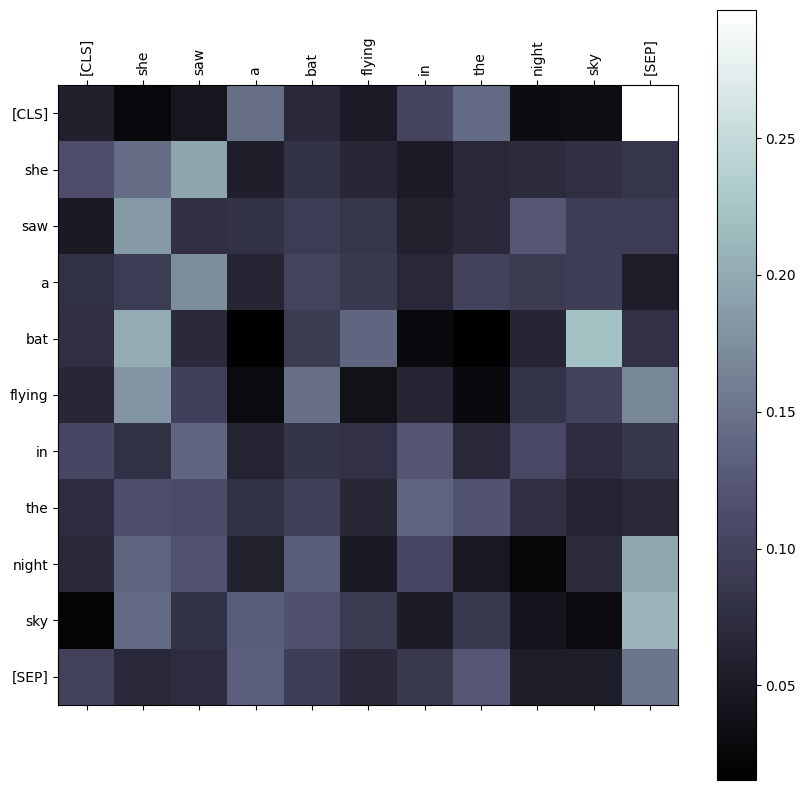

In [45]:
# Visualizing the attention weights
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(attention1, cmap='bone')
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + tokens1, rotation=90)
ax.set_yticklabels([''] + tokens1)

# Show labels at every tick
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

plt.show()

<ipython-input-46-085e376eade1>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + tokens2, rotation=90)


[Text(-2.0, 1, ''),
 Text(0.0, 1, '[CLS]'),
 Text(2.0, 1, 'he'),
 Text(4.0, 1, 'used'),
 Text(6.0, 1, 'a'),
 Text(8.0, 1, 'bat'),
 Text(10.0, 1, 'to'),
 Text(12.0, 1, 'hit'),
 Text(14.0, 1, 'the')]

<ipython-input-46-085e376eade1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + tokens2)


[Text(0, -2.0, ''),
 Text(0, 0.0, '[CLS]'),
 Text(0, 2.0, 'he'),
 Text(0, 4.0, 'used'),
 Text(0, 6.0, 'a'),
 Text(0, 8.0, 'bat'),
 Text(0, 10.0, 'to'),
 Text(0, 12.0, 'hit'),
 Text(0, 14.0, 'the')]

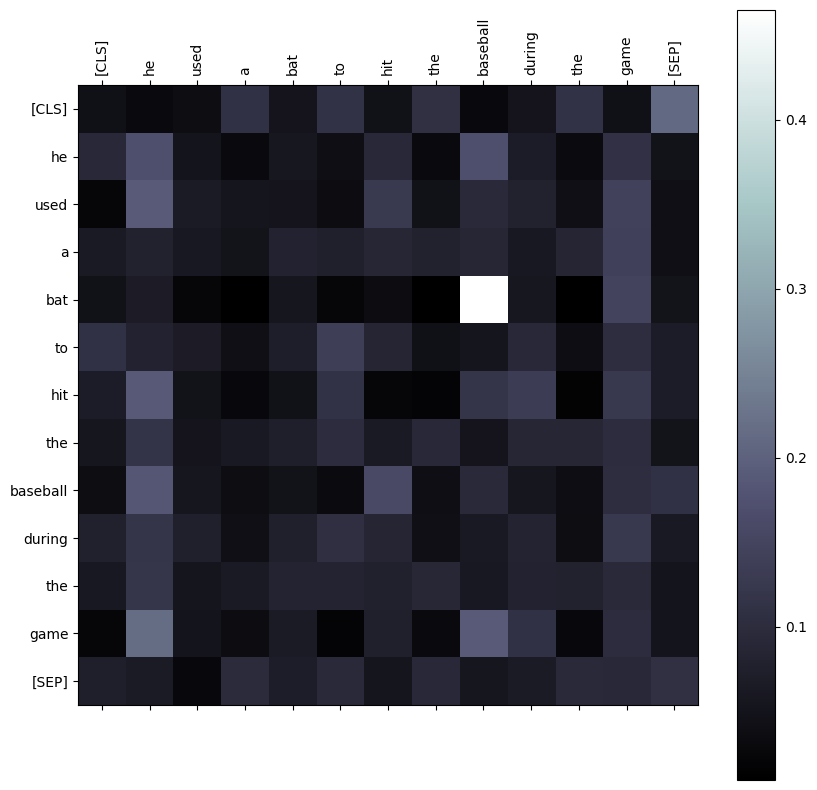

In [46]:
# Visualizing the attention weights
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(attention2, cmap='bone')
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + tokens2, rotation=90)
ax.set_yticklabels([''] + tokens2)

# Show labels at every tick
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

plt.show()

We see that the model finds a strong correlation between the words 'bat' and 'baseball' in sentence 2, where it struggles a bit more in sentence 1. Here the strongest corralations with the word 'bat' is in the words 'sky' and 'she'. So the model misunderstands the context a bit in sentence 1.